## Welcome my_vivino project

**Installation**

In [ ]:
!pip install scikit-learn
!pip install lightgbm
!pip install catboost 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.2 MB/s eta 0:00:00


**Libraryes**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import  r2_score
from sklearn import preprocessing

*Load data*

In [ ]:
wine_data = pd.read_csv('vivino_data.csv')
wine_data.head(10)

,Winery,Year,Wine_ID,Wine,Rating,Reviews,Price,Region,Primary_Grape,Natural,Country,Style,Country_Code
0,Baron de Ley,2020,8729994,Rosado de Lágrima 2020,4.2,42,7.15,La Rioja,Malbec,False,Argentina,Rose,ARG
1,New Age,N.V.,7704484,Sweet White N.V.,3.9,5672,7.43,Mendoza,Malbec,False,Argentina,White,ARG
2,Alamos,2018,68764,Malbec Rosé 2018,3.9,384,8.00,Valle de Uco,Malbec,False,Argentina,Rose,ARG
3,Alamos,2019,2166,Torrontes 2019,3.8,820,8.00,Salta,Malbec,False,Argentina,White,ARG
4,Alamos,2020,1387085,Cabernet Sauvignon 2020,3.6,489,8.00,Mendoza,Malbec,False,Argentina,Red,ARG
5,Alamos,2020,69694,Chardonnay 2020,3.7,851,8.00,Mendoza,Malbec,False,Argentina,White,ARG
6,Alamos,2020,1879,Malbec 2020,3.8,3153,8.00,Mendoza,Malbec,False,Argentina,Red,ARG
7,Amalaya,2020,1177446,Blanco (Torrontés - Riesling) 2020,3.8,501,8.50,Salta,Malbec,False,Argentina,White,ARG
8,Alamos,2019,2162,Bonarda 2019,3.8,1147,8.54,Mendoza,Malbec,False,Argentina,Red,ARG
9,Bodega Piedra Negra,2019,1233100,Alta Colección Pinot Gris 2019,3.6,149,8.90,Valle de Uco,Malbec,False,Argentina,White,ARG


In [ ]:
wine_data.tail()

,Winery,Year,Wine_ID,Wine,Rating,Reviews,Price,Region,Primary_Grape,Natural,Country,Style,Country_Code
12200,Glenelly,2017,1170241,The Glass Collection Syrah 2017,3.6,199,10.890000,Stellenbosch,Cabernet Sauvignon,False,South Africa,Red,ZAF
12201,Lourensford,2019,1176448,The River Garden Sauvignon Blanc 2019,3.4,107,7.900000,Western Cape,Cabernet Sauvignon,False,South Africa,White,ZAF
12202,Springfield Estate,2021,1192074,Life from Stone Sauvignon Blanc 2021,4.3,323,12.800000,Robertson,Cabernet Sauvignon,False,South Africa,White,ZAF
12203,Meerlust,2017,19306,Cabernet Sauvignon 2017,4.1,178,22.900000,Stellenbosch,Cabernet Sauvignon,False,South Africa,Red,ZAF
12204,Percheron,2020,1176900,Old Vine Cinsault 2020,3.9,112,10.551328,Western Cape,Cabernet Sauvignon,False,South Africa,Red,ZAF


In [ ]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Winery         12205 non-null  object 
 1   Year           12190 non-null  object 
 2   Wine_ID        12205 non-null  int64  
 3   Wine           12205 non-null  object 
 4   Rating         12205 non-null  float64
 5   Reviews        12205 non-null  int64  
 6   Price          12205 non-null  float64
 7   Region         12205 non-null  object 
 8   Primary_Grape  12205 non-null  object 
 9   Natural        12205 non-null  bool   
 10  Country        12205 non-null  object 
 11  Style          12205 non-null  object 
 12  Country_Code   12205 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(8)
memory usage: 1.1+ MB


In [ ]:
wine_data.shape

(12205, 13)

In [ ]:
wine_data.describe()

,Wine_ID,Rating,Reviews,Price
count,1.220500e+04,12205.000000,12205.000000,12205.000000
mean,2.122684e+06,3.919992,498.468005,42.610824
std,2.068168e+06,0.322382,2333.570088,116.172437
min,5.310000e+02,1.900000,25.000000,2.070000
25%,1.135203e+06,3.700000,55.000000,8.950000
50%,1.425545e+06,3.900000,122.000000,17.900000
75%,2.486838e+06,4.100000,330.000000,37.000000
max,1.020577e+07,4.900000,114425.000000,6511.310000


In [ ]:
wine_data.columns

Index(['Winery', 'Year', 'Wine_ID', 'Wine', 'Rating', 'Reviews', 'Price',
       'Region', 'Primary_Grape', 'Natural', 'Country', 'Style',
       'Country_Code'],
      dtype='object')

# Data cleaning

**Tasks**

1.Delete Wine_id column.

2.Delete Wine column.

3.N.V. on the pillar of the Year column change to 2021

4.Update Primary_Grape column name.

5.Delete the columned name natural.

In [ ]:
def data_clean(wines_data):
  wines_data = wines_data.drop("Wine_ID", axis=1) # The wino id was redundant and not useful information for me.
  wines_data = wines_data.drop("Wine", axis=1) # I decided to remove the name of the wine because it was not clear to me.
  wines_data = wines_data.drop("Natural", axis = 1)
  wines_data.rename(columns = {'Primary_Grape':'Grapes',}, inplace = True) # I abbreviated the column name because it was too long and awkward to use.
  wines_data['Year'] = wines_data['Year'].replace('N.V.', 2021) #In this date, N.V meant 2021, but it is written because it is now 2022.  
  wines_data = wines_data.dropna()
  wines_data['Year'] = wines_data['Year'].astype('int')


  wines_data.isnull().sum()/wine_data.shape[0]
  
  return wines_data

In [ ]:
wine = data_clean(wine_data)
wine

,Winery,Year,Rating,Reviews,Price,Region,Grapes,Country,Style,Country_Code
0,Baron de Ley,2020,4.2,42,7.150000,La Rioja,Malbec,Argentina,Rose,ARG
1,New Age,2021,3.9,5672,7.430000,Mendoza,Malbec,Argentina,White,ARG
2,Alamos,2018,3.9,384,8.000000,Valle de Uco,Malbec,Argentina,Rose,ARG
3,Alamos,2019,3.8,820,8.000000,Salta,Malbec,Argentina,White,ARG
4,Alamos,2020,3.6,489,8.000000,Mendoza,Malbec,Argentina,Red,ARG
...,...,...,...,...,...,...,...,...,...,...
12200,Glenelly,2017,3.6,199,10.890000,Stellenbosch,Cabernet Sauvignon,South Africa,Red,ZAF
12201,Lourensford,2019,3.4,107,7.900000,Western Cape,Cabernet Sauvignon,South Africa,White,ZAF
12202,Springfield Estate,2021,4.3,323,12.800000,Robertson,Cabernet Sauvignon,South Africa,White,ZAF
12203,Meerlust,2017,4.1,178,22.900000,Stellenbosch,Cabernet Sauvignon,South Africa,Red,ZAF


**Data Visualization**

In [ ]:
def first_visual(wine_data):
  plt.figure(figsize=(20,14))
  sns.barplot(x="Country",
              y="Rating",
              hue="Style",
              data = wine_data)
  plt.xticks(rotation=70)

  plt.show()

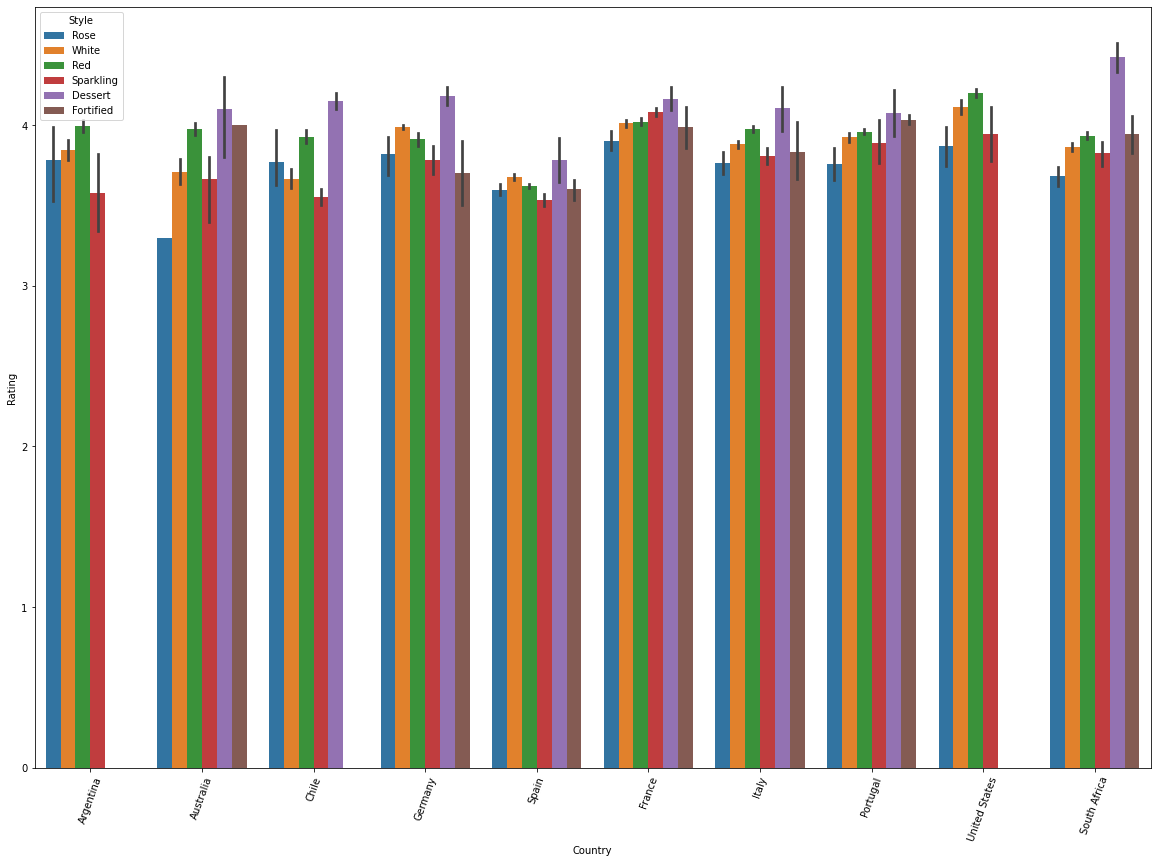

In [ ]:
first_visual(wine)

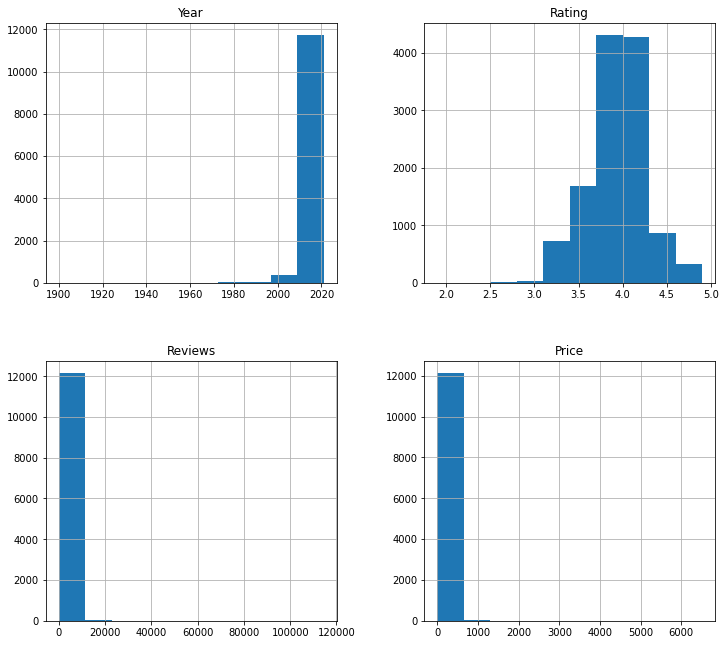

In [ ]:
def visual_hist(wine_data):
  wine_data.hist(figsize=(12,11))

visual_hist(wine)


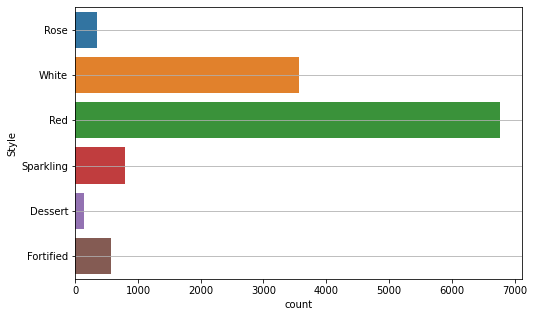

In [ ]:
def style_dataset(wine_data):
    plt.figure(figsize=(8, 5))
    sns.countplot(y="Style", data=wine_data);
    plt.grid(axis='y')
style_dataset(wine)

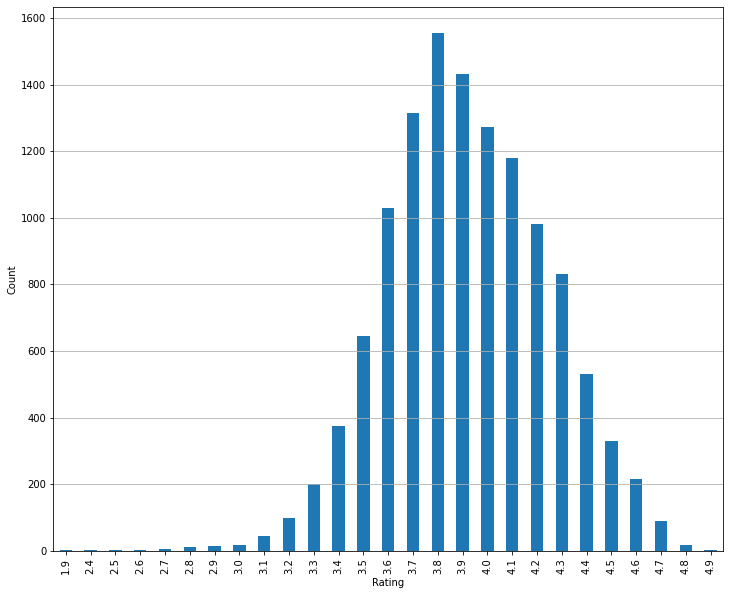

In [ ]:
def rating_data(wine_data):
    plt.figure(figsize=(12, 10))
    plt.ylabel('Count')
    data = wine_data.groupby(['Rating'])['Reviews'].count()
    data.plot(kind='bar')
    plt.grid(axis='y')

rating_data(wine)

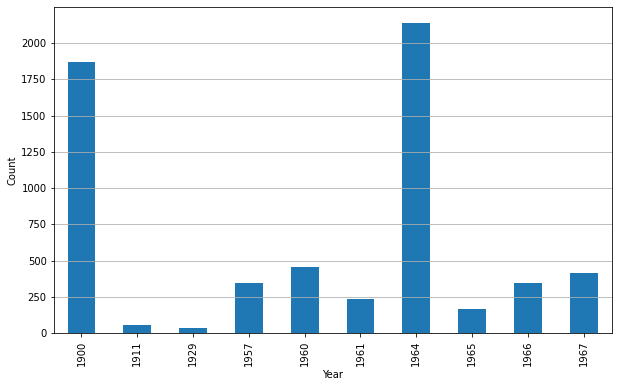

In [ ]:
def price_dataset(data):
    plt.figure(figsize=(10, 6))
    plt.ylabel('Count')
    top = data.groupby(['Year'])['Price'].sum().head(10)
    top.plot(kind='bar')
    plt.grid(axis='y')
price_dataset(wine)

In [ ]:
def next_visual(wine_data):
  plt.figure(figsize=(20,10))
  plt.subplot(122)
  data = wine_data.groupby(wine_data['Country'])['Region'].count().sort_values(ascending=False).head(10)
  data.plot(marker='o', markersize=10, color='red')
  data.plot(kind='bar', color='green')
  plt.title('Describtion of Country')
  plt.grid(axis='y')
  plt.show()


def next_visuals(wine_data):
  plt.figure(figsize=(20,10))
  plt.subplot(121)
  data = wine_data.groupby(wine_data['Country'])['Region'].count().sort_values(ascending=False).head(10)
  data.plot.pie(autopct='%1.f%%',
                                    wedgeprops={'linewidth':10,'edgecolor':'white'},
                                    shadow=True,
                                    fontsize=20)
  plt.title("%Wine Distribution of Country")

  plt.show()
  

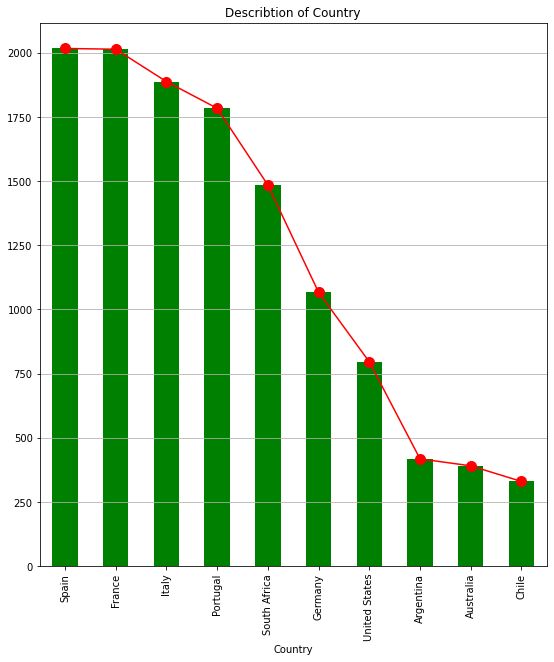

In [ ]:
next_visual(wine)

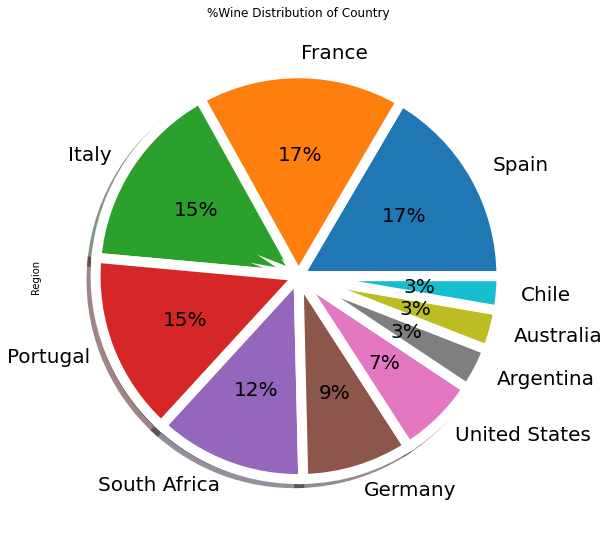

In [ ]:
next_visuals(wine)

<ipython-input-29-c4086698effe>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = wine_data.groupby('Country')['Price','Rating'].count()


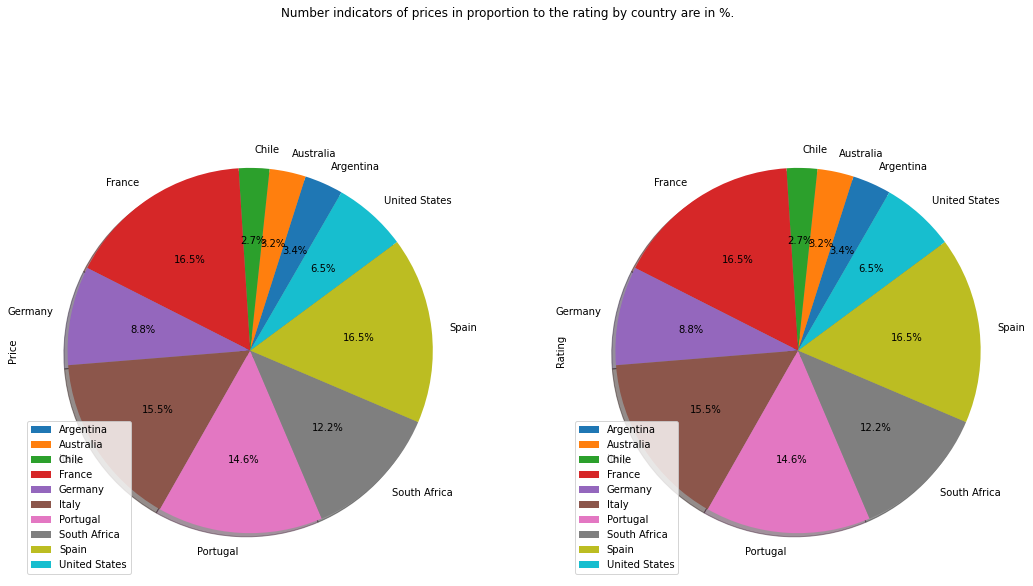

In [ ]:
def count_rat_price(wine_data):
  df = wine_data.groupby('Country')['Price','Rating'].count()
  dataset = df.plot(kind='pie', figsize=(18,10), autopct='%1.1f%%', subplots=True, shadow=True, startangle=60,  title='Number indicators of prices in proportion to the rating by country are in %.')
    
count_rat_price(wine)

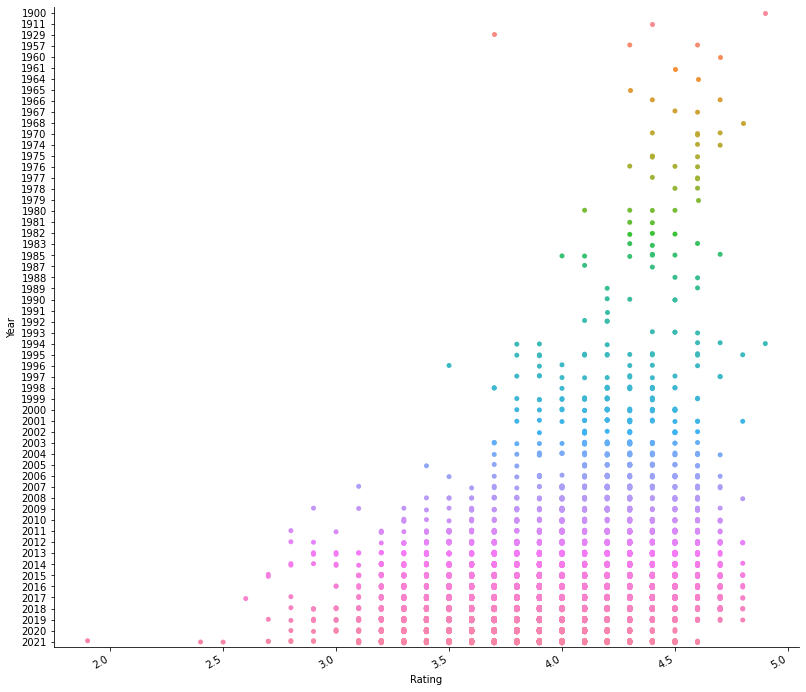

In [ ]:
def data_of_year(wine_data):
    ax = sns.catplot(x='Rating', y='Year', data=wine_data, orient="h",height=11.30)
    ax.fig.autofmt_xdate()
    plt.show()
    
data_of_year(wine)

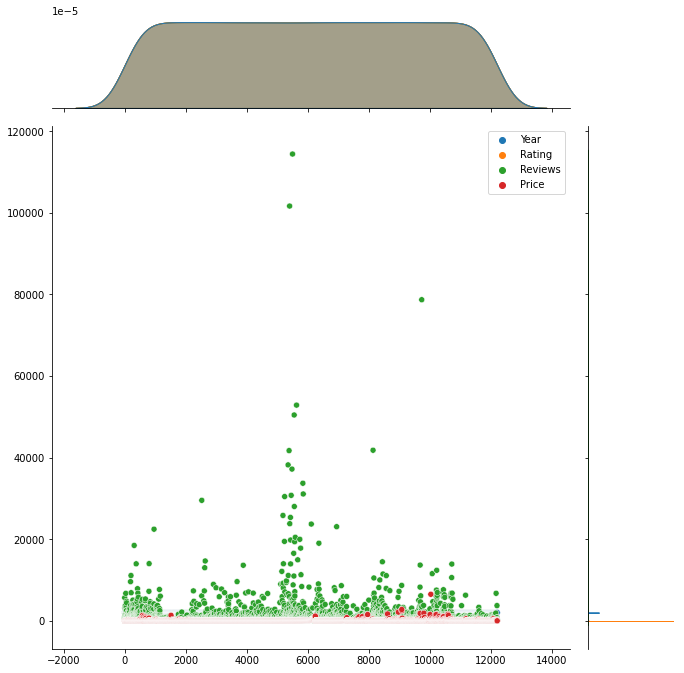

In [ ]:
sns.jointplot(data=wine, height=9.30)
plt.show()

In [ ]:
def Encoder(wine_data):
    wine = pd.get_dummies(wine_data, columns = ['Style'])
    categorical_cols = [col for col in wine.columns if wine[col].dtype == "object"]
    label_encoder = preprocessing.LabelEncoder()
    for col in categorical_cols:
        wine[col] = label_encoder.fit_transform(wine[col])
    return wine

wine_dataset = Encoder(wine)
wine_dataset

,Winery,Year,Rating,Reviews,Price,Region,Grapes,Country,Country_Code,Style_Dessert,Style_Fortified,Style_Red,Style_Rose,Style_Sparkling,Style_White
0,268,2020,4.2,42,7.150000,392,1,0,0,0,0,0,1,0,0
1,2586,2021,3.9,5672,7.430000,445,1,0,0,0,0,0,0,0,1
2,53,2018,3.9,384,8.000000,752,1,0,0,0,0,0,1,0,0
3,53,2019,3.8,820,8.000000,645,1,0,0,0,0,0,0,0,1
4,53,2020,3.6,489,8.000000,445,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,1755,2017,3.6,199,10.890000,693,0,7,9,0,0,1,0,0,0
12201,2274,2019,3.4,107,7.900000,820,0,7,9,0,0,0,0,0,1
12202,3302,2021,4.3,323,12.800000,606,0,7,9,0,0,0,0,0,1
12203,2438,2017,4.1,178,22.900000,693,0,7,9,0,0,1,0,0,0


In [ ]:
def correlation(data_set):
    sns.set_style('darkgrid')
    correlations  = data_set.corr()
    plt.figure(figsize=(18,9))
    sns.pairplot(data=correlations, diag_kws=dict(color='blue', kde=TabError), plot_kws=dict(color='green', marker=10, s=100))
    plt.show()

def corr(data_set):
    correlations  = data_set.corr()
    plt.figure(figsize=(18,9))
    sns.heatmap(correlations, vmin=-1, vmax=1, center=0, cmap='Set3_r', annot=True, fmt='.1f', annot_kws=dict(size=15, weight='bold'), linecolor='black', linewidth=.5)
    plt.show()



<Figure size 1296x648 with 0 Axes>

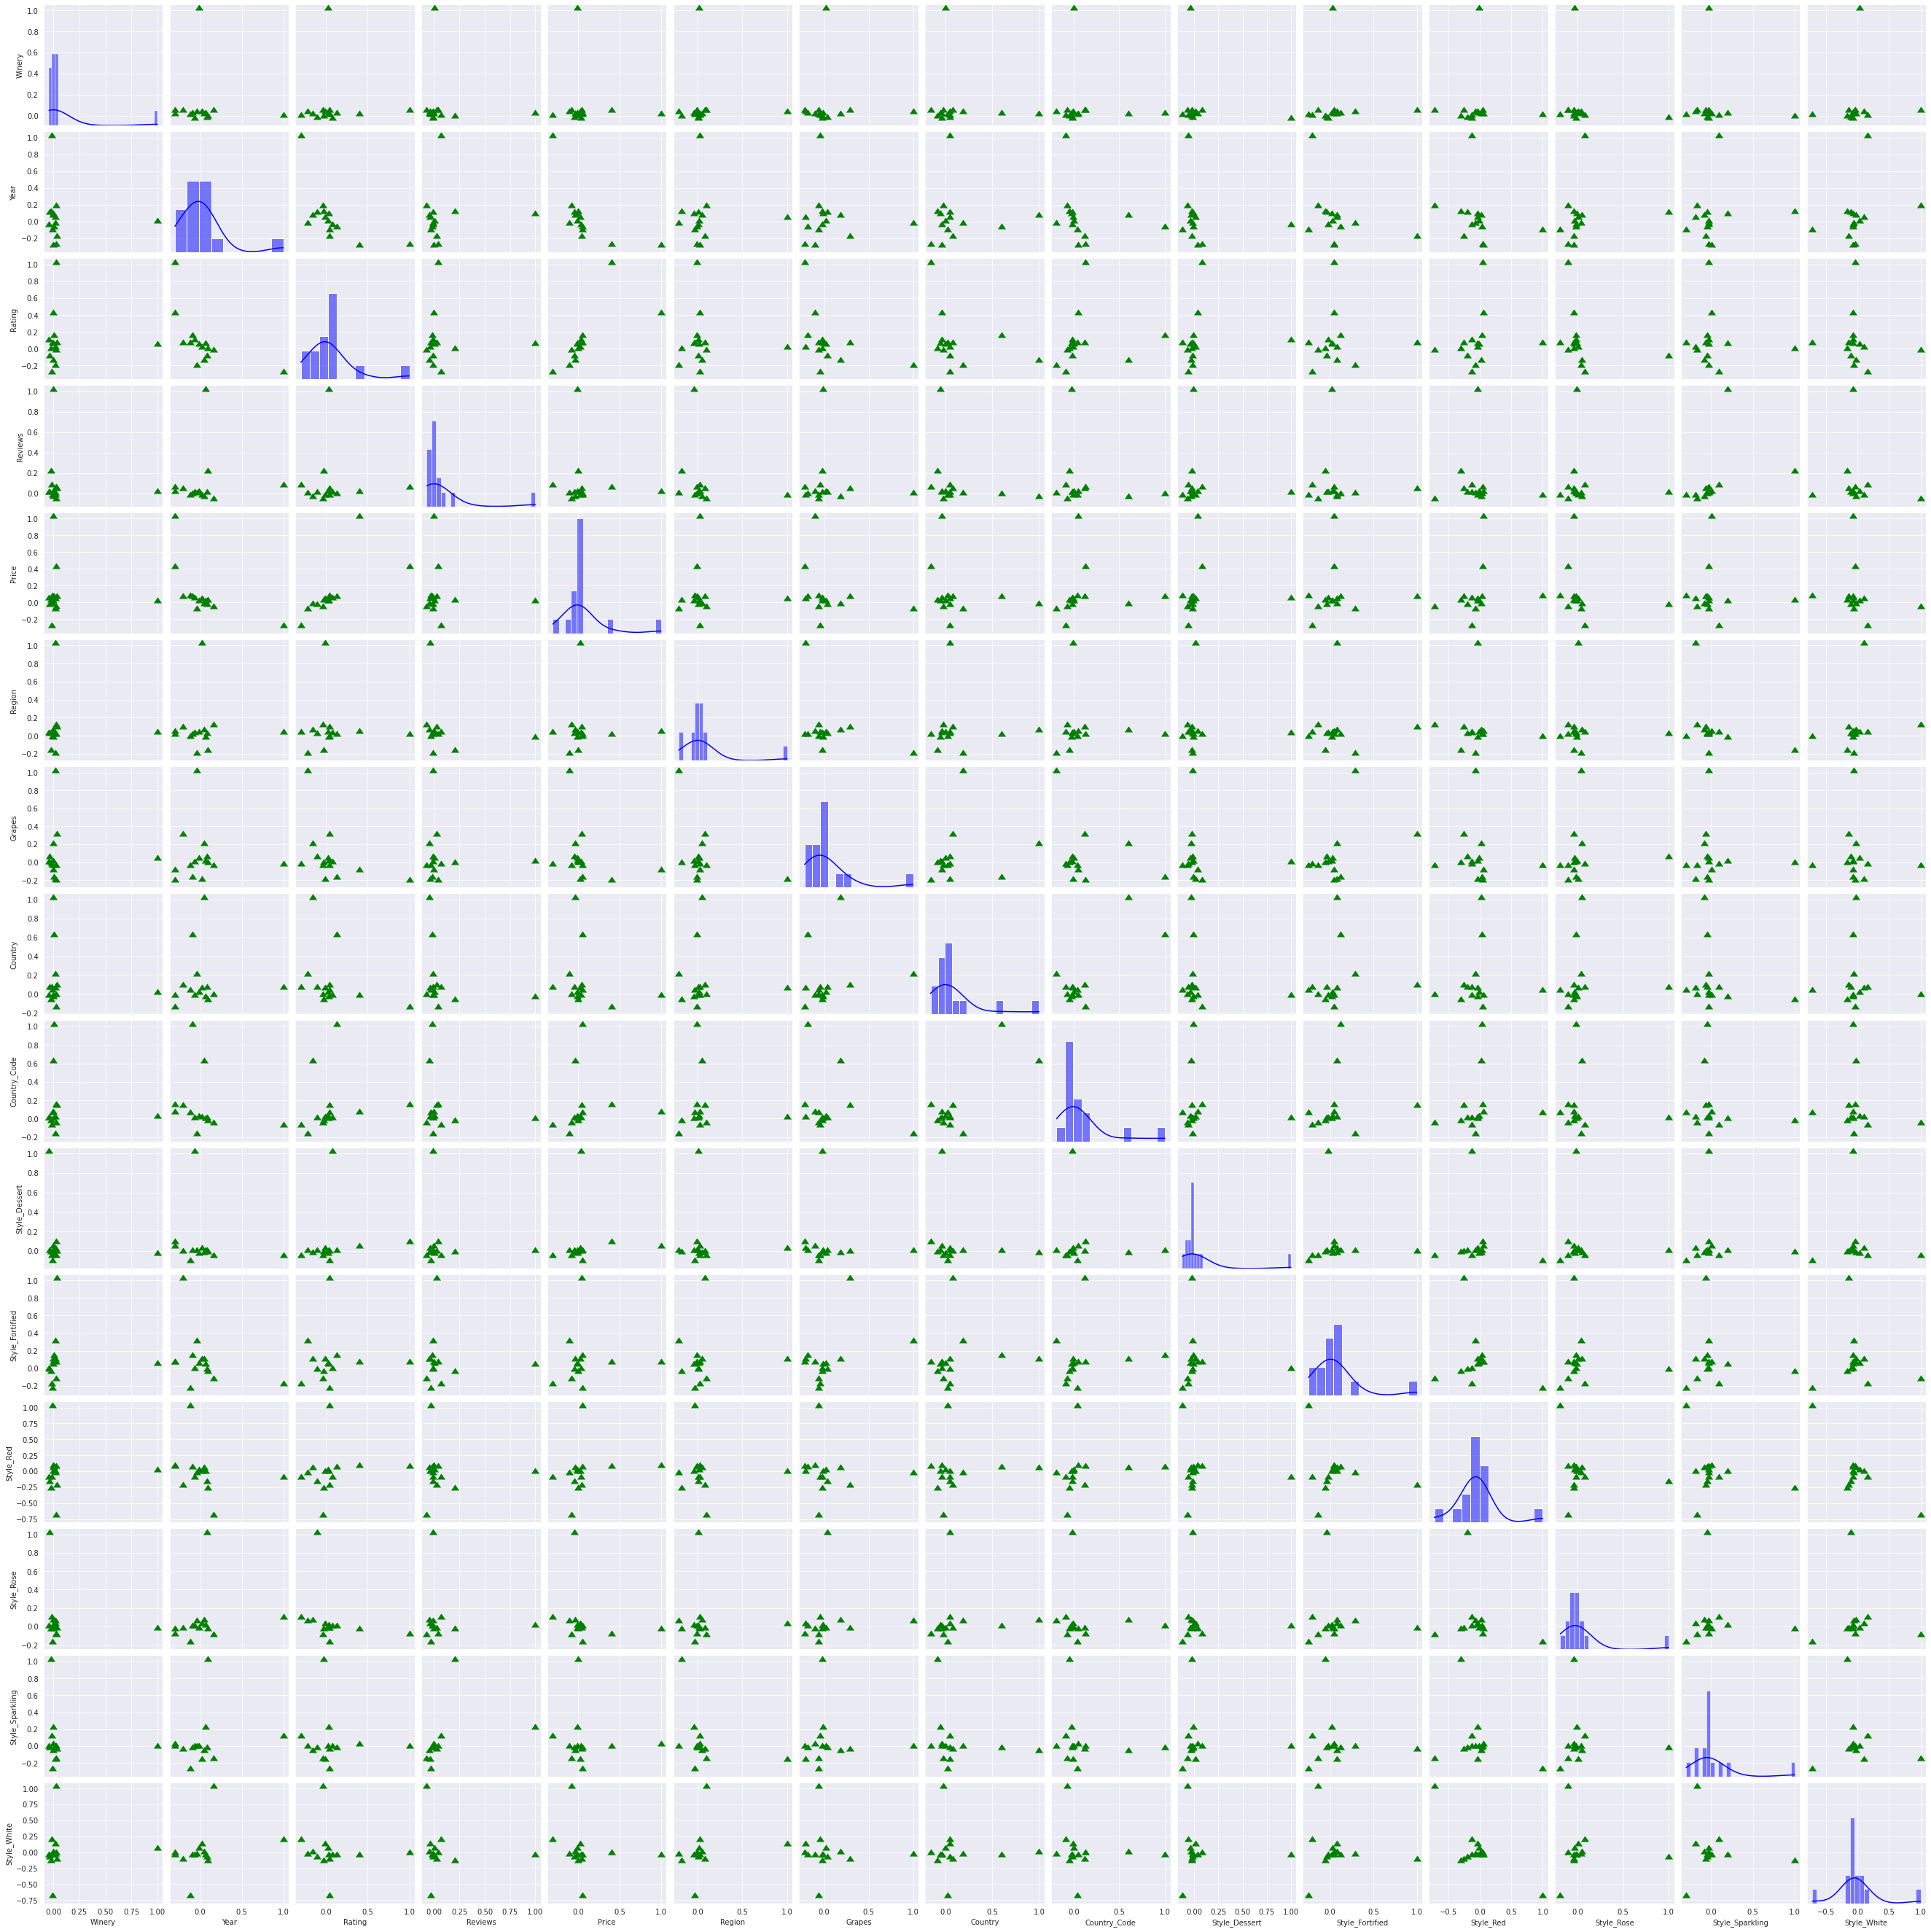

In [ ]:
correlation(wine_dataset)

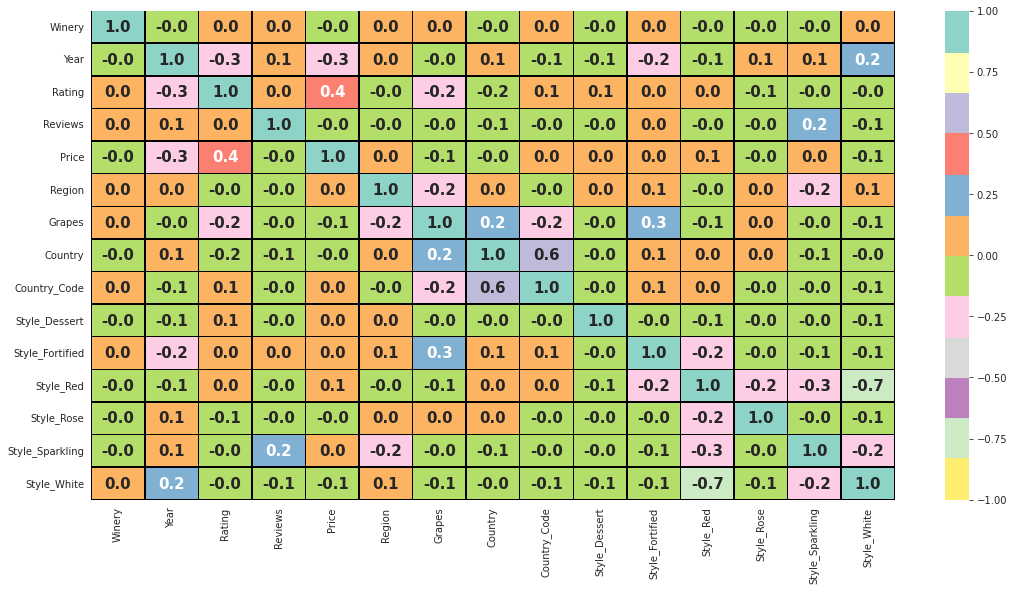

In [ ]:
corr(wine_dataset)

In [ ]:
def predic_wine_price(data):
    x = data[['Rating', 'Winery','Year', 'Reviews','Region', 'Country']]
    y = data['Price']


    x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=50)


    c_b_r  = CatBoostRegressor().fit(x_train, y_train) 

    g_b_r  = GradientBoostingRegressor().fit(x_train, y_train) 

    l_r = LGBMRegressor().fit (x_train, y_train)


    list_madels1 = [c_b_r, g_b_r, l_r ]  
    
    reg_test =[]   

    for madel in list_madels1:
      predict = madel.predict(x_test)
      reg_test.append( round(r2_score(y_test, predict)*100 , 1 ) )

  
    Res_data = "CatBoostRegressor GradientBoostingRegressor LinearRegression".split()
    result = pd.DataFrame({'R2_Test':reg_test}, index = Res_data)
    return result


In [ ]:
predic_wine_price(wine_dataset)

Learning rate set to 0.058675
0:	learn: 116.8384840	total: 51.7ms	remaining: 51.7s
1:	learn: 114.7575012	total: 60.2ms	remaining: 30s
2:	learn: 112.2990824	total: 78.2ms	remaining: 26s
3:	learn: 109.8099007	total: 89.1ms	remaining: 22.2s
4:	learn: 107.6597758	total: 93.4ms	remaining: 18.6s
5:	learn: 105.8445471	total: 101ms	remaining: 16.7s
6:	learn: 104.1545781	total: 108ms	remaining: 15.4s
7:	learn: 102.2676453	total: 116ms	remaining: 14.3s
8:	learn: 100.5073791	total: 123ms	remaining: 13.5s
9:	learn: 98.9414987	total: 130ms	remaining: 12.9s
10:	learn: 97.5011216	total: 137ms	remaining: 12.3s
11:	learn: 96.0488691	total: 145ms	remaining: 11.9s
12:	learn: 94.7114449	total: 152ms	remaining: 11.6s
13:	learn: 94.0740316	total: 159ms	remaining: 11.2s
14:	learn: 93.1021588	total: 166ms	remaining: 10.9s
15:	learn: 91.9755773	total: 169ms	remaining: 10.4s
16:	learn: 90.8309581	total: 172ms	remaining: 9.94s
17:	learn: 89.6708106	total: 175ms	remaining: 9.55s
18:	learn: 88.6765610	total: 180ms

,R2_Test
CatBoostRegressor,53.7
GradientBoostingRegressor,51.6
LinearRegression,45.5
